# Exploratory Data Analysis - Customer Loans in Finance

In [1]:
import matplotlib.pyplot as plt
import missingno as msno
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot
from statsmodels.graphics.gofplots import qqplot
from scipy import stats
from sklearn.preprocessing import PowerTransformer
import statsmodels.api as sm
from datetime import datetime, timedelta

### Converting columns to the correct format

In [2]:
# Importing DataTransform class from db_transform
from db_transform import DataTransform 

df = pd.read_csv('/Users/maria/AiCore_Projects/exploratory-data-analysis---customer-loans-in-finance914/loan_payments_data.csv')

# Creating an instance of the DataTransform Class
data_transformer = DataTransform(df)

# Defining the columns to be converted
numeric_columns = ['collections_12_mths_ex_med']
object_columns = ['purpose', 'application_type']
date_columns = ['issue_date', 'last_payment_date', 'next_payment_date', 'last_credit_pull_date', 'earliest_credit_line']
category_columns = ['grade', 'sub_grade', 'home_ownership', 'verification_status']
bool_columns = ['payment_plan']
employment_columns = ['employment_length']

# Transforming the columns
data_transformer.convert_to_int(numeric_columns)
data_transformer.convert_to_object(object_columns)
data_transformer.convert_to_date(date_columns)
data_transformer.convert_to_category(category_columns)
data_transformer.convert_to_bool(bool_columns)
data_transformer.convert_employment_length(employment_columns)

### Created DataFrameInfo class to get information from the DataFrame

In [3]:
# Importing DataTransform class from db_info
from db_info import DataFrameInfo

# Creating an instance of the DataFrameInfo Class
db_info = DataFrameInfo(df)

print(db_info.describe_columns())
print(db_info.extract_stats())
print(db_info.df_shape())
print(db_info.null_values())
print(db_info.distinct_values())

id                                      int64
member_id                               int64
loan_amount                             int64
funded_amount                         float64
funded_amount_inv                     float64
term                                    Int64
int_rate                              float64
instalment                            float64
grade                                category
sub_grade                            category
employment_length                       Int64
home_ownership                       category
annual_inc                            float64
verification_status                  category
issue_date                     datetime64[ns]
loan_status                            object
payment_plan                             bool
purpose                                object
dti                                   float64
delinq_2yrs                             int64
earliest_credit_line           datetime64[ns]
inq_last_6mths                    

### Visualising insights from the data

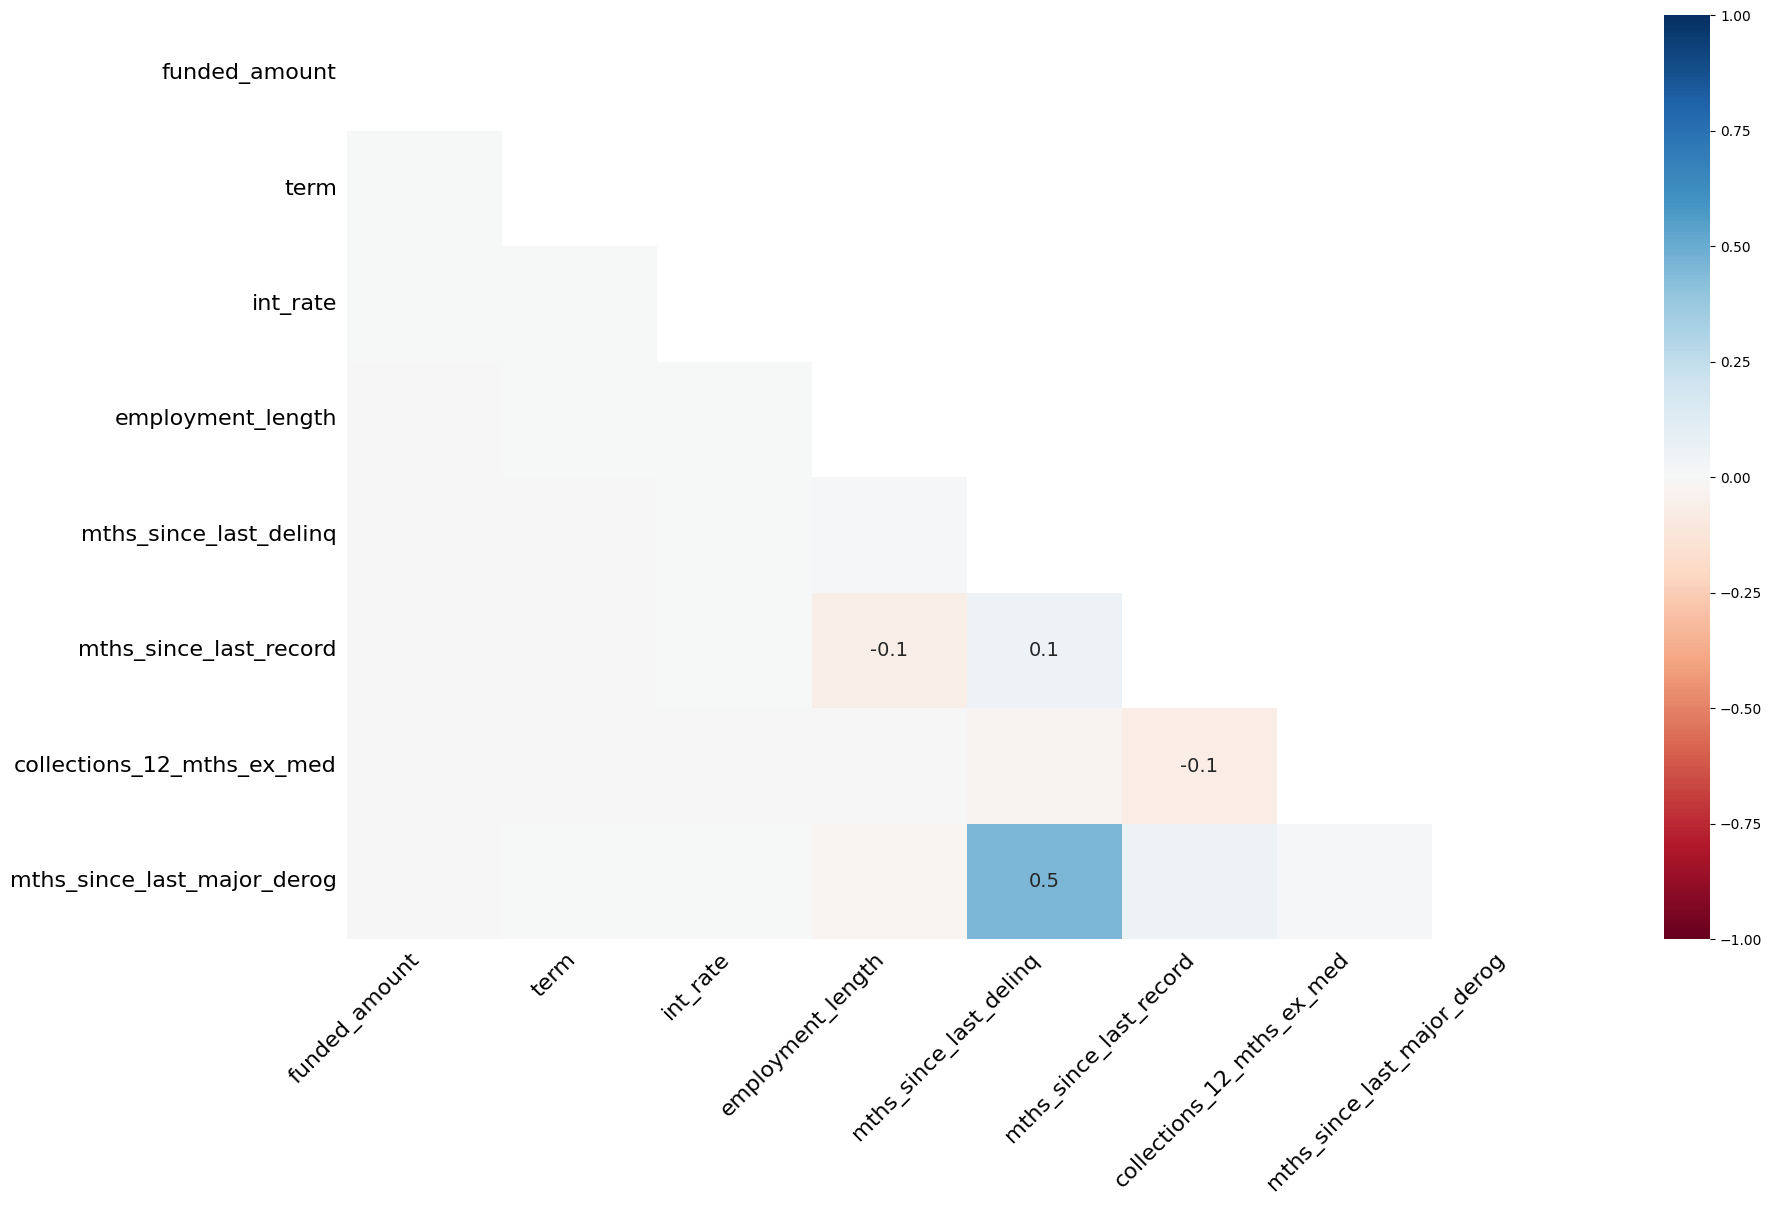

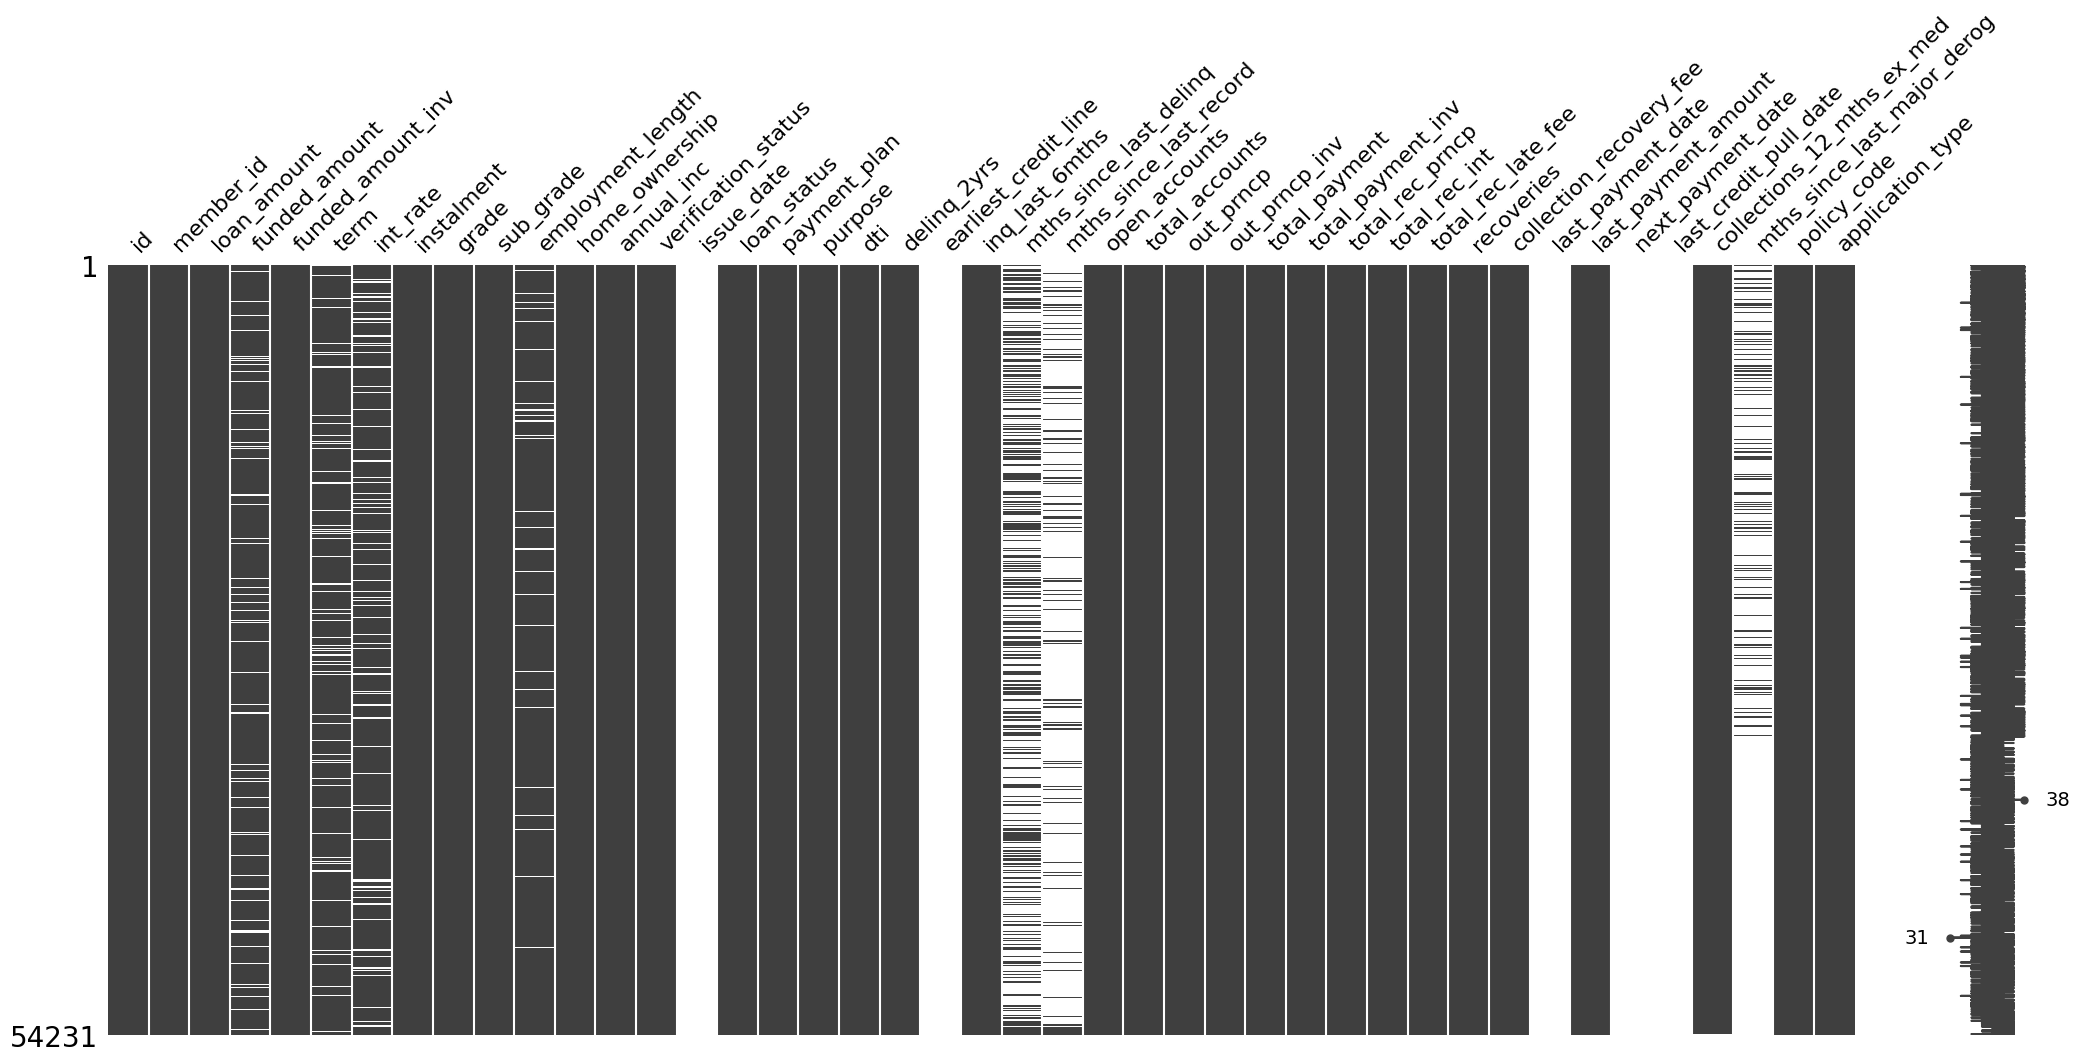

In [4]:
# Importing Plotter class from db_plotter
from db_plotter import Plotter

# Creating an instance of the Plotter Class
data_plotter = Plotter()

# Heatmap method
data_plotter.null_heatmap(df)

# Matrix method
data_plotter.null_matrix(df)


### Median and Mean

In [5]:
# Funded_amount
print(f'The median of the funded amount is {df["funded_amount"].median()}')
print(f'The mean of the funded amount is {df["funded_amount"].mean()}')

# Term
print(f'The median of the term is {df["term"].median()}')
print(f'The mode of the term is {df["term"].mode()}')

# Interest rate 
print(f'The median of the interest rate is {df["int_rate"].median()}')
print(f'The mean of the interest rate is {df["int_rate"].mean()}')

# Employment length 
print(f'The median of the employment length is {df["employment_length"].median()}')
print(f'The mean of the employment length is {df["employment_length"].mean()}')
print(f'The mode of the employment length is {df["employment_length"].mode()}')

The median of the funded amount is 12000.0
The mean of the funded amount is 13229.50911682024
The median of the term is 36.0
The mode of the term is 0    36
Name: term, dtype: Int64
The median of the interest rate is 13.16
The mean of the interest rate is 13.507328482328484
The median of the employment length is 6.0
The mean of the employment length is 5.7873467273041275
The mode of the employment length is 0    10
Name: employment_length, dtype: Int64


### Removing/Imputing missing values in the data

id                              0.000000
member_id                       0.000000
loan_amount                     0.000000
funded_amount                   0.000000
funded_amount_inv               0.000000
term                            0.000000
int_rate                        0.000000
instalment                      0.000000
grade                           0.000000
sub_grade                       0.000000
employment_length               0.000000
home_ownership                  0.000000
annual_inc                      0.000000
verification_status             0.000000
issue_date                    100.000000
loan_status                     0.000000
payment_plan                    0.000000
purpose                         0.000000
dti                             0.000000
delinq_2yrs                     0.000000
earliest_credit_line          100.000000
inq_last_6mths                  0.000000
open_accounts                   0.000000
total_accounts                  0.000000
out_prncp       

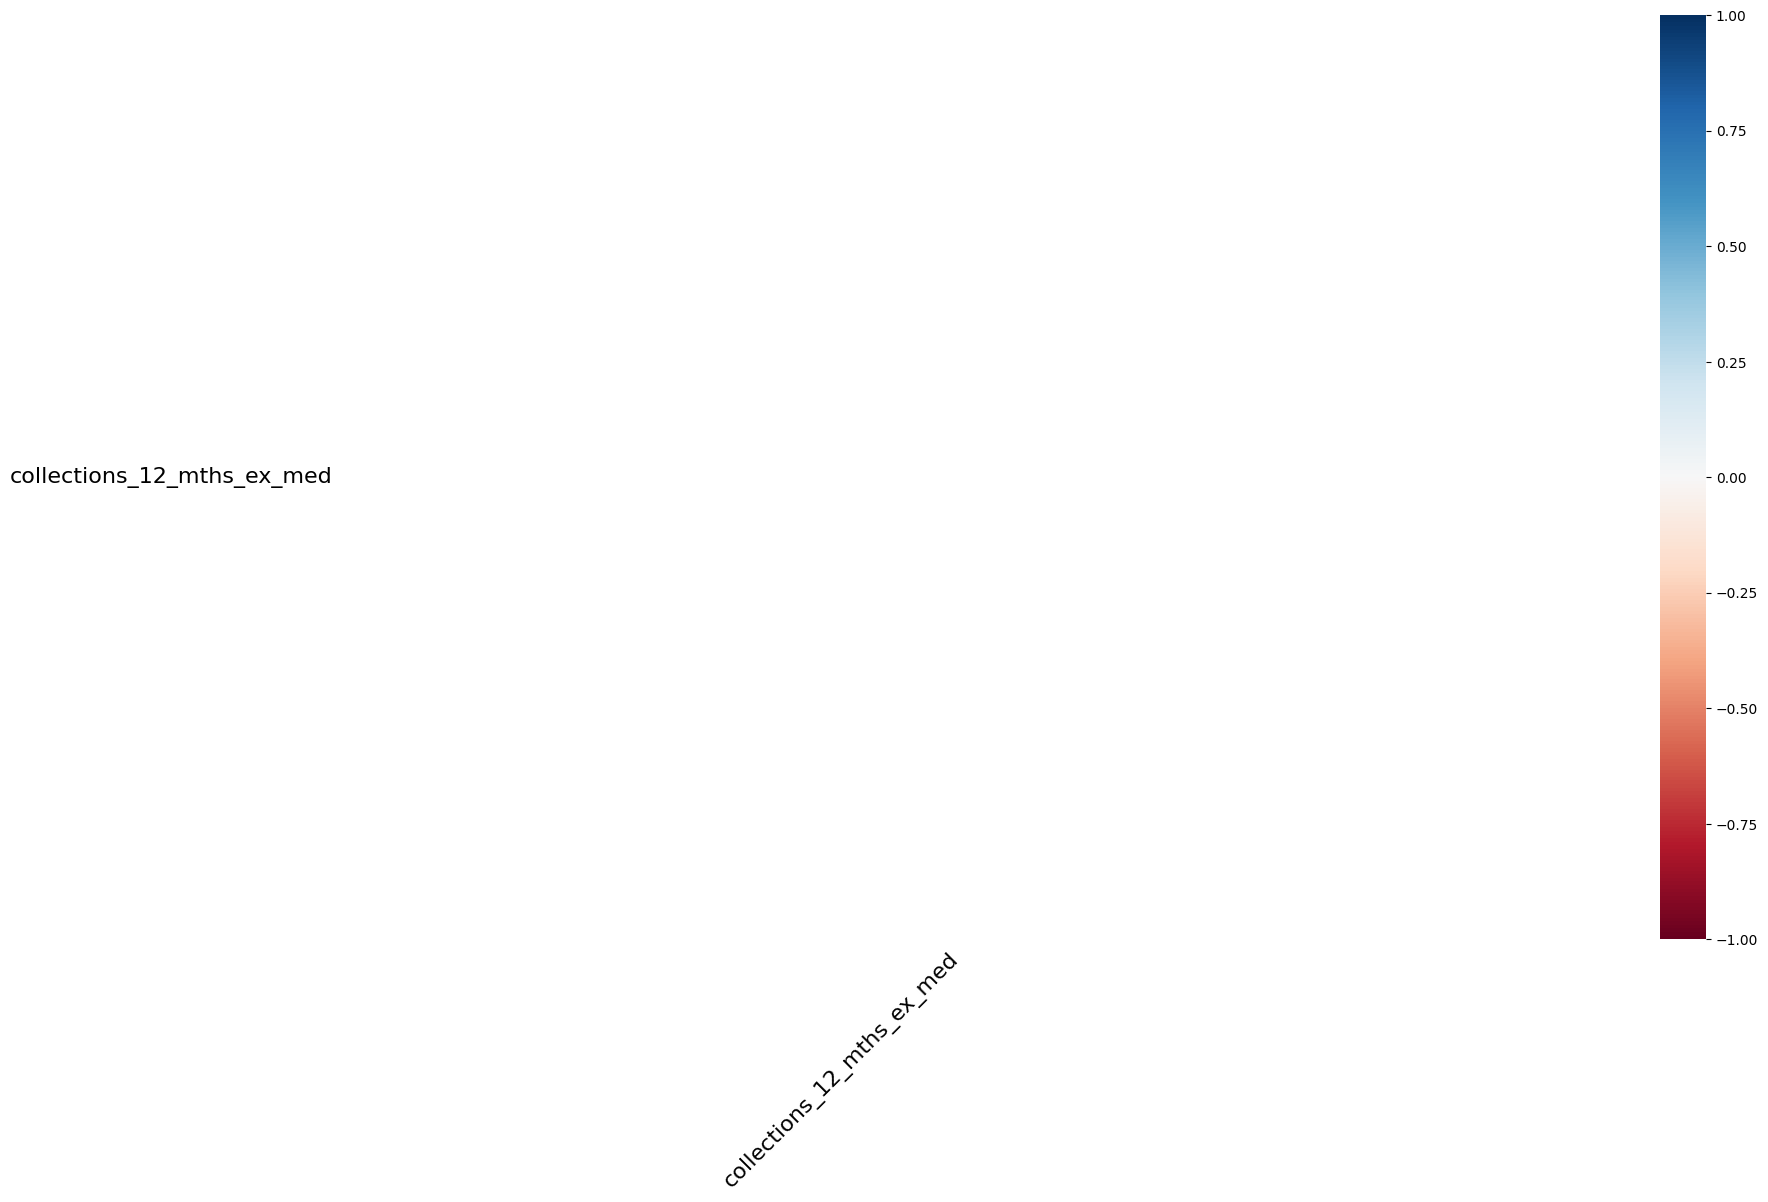

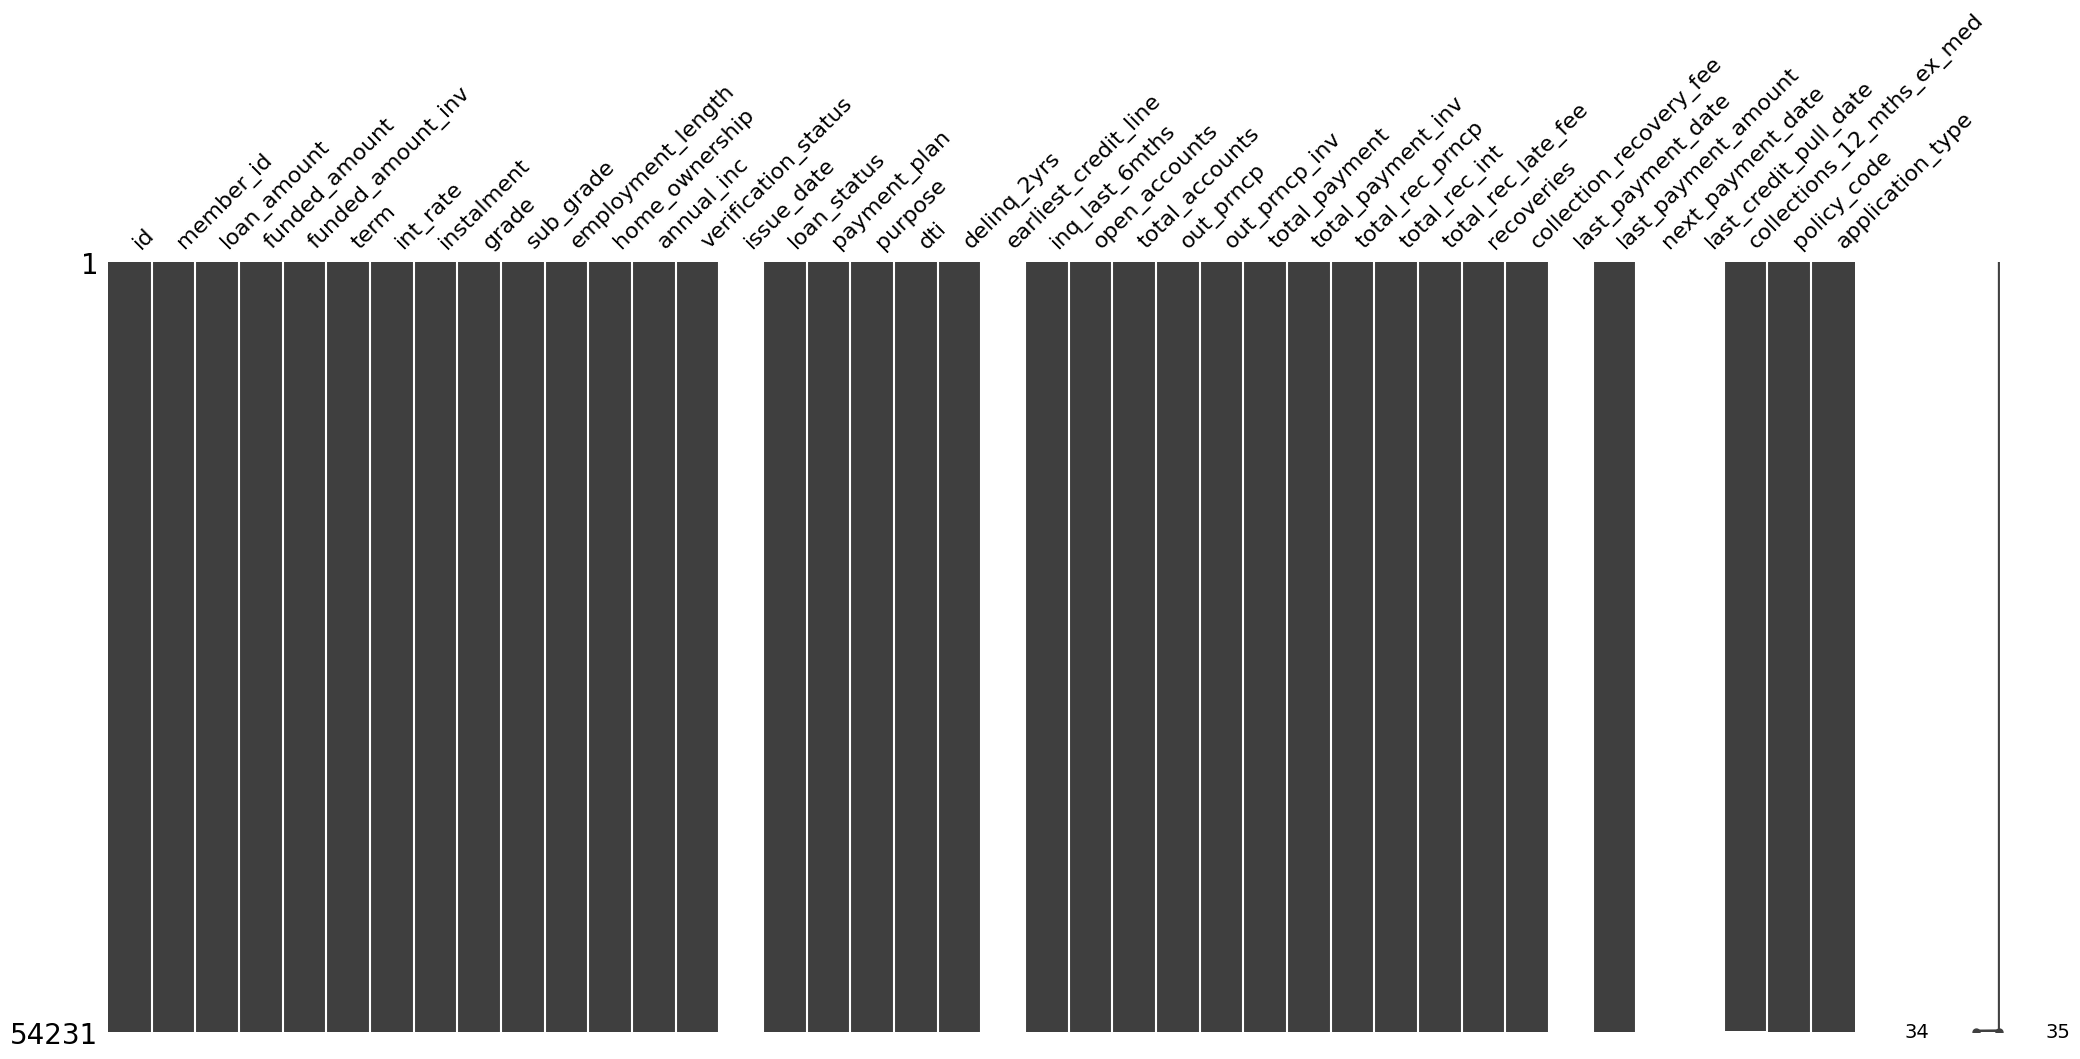

In [6]:
# Importing DataFrameTransform class from db_null_transform
from db_null_transform import DataFrameTransform

# Creating an instance of the DataFrameTransform Class
df_transform = DataFrameTransform

# Impute missing values with median
columns_to_impute = ['funded_amount', 'term', 'int_rate', 'employment_length']
df_imputed_values = df_transform.impute_missing_values(df, columns_to_impute)

# Dropping columns with > 50% missing values 
columns_to_drop = ['mths_since_last_delinq', 'mths_since_last_record', 'mths_since_last_major_derog']
df_dropped_cols = df_transform.drop_columns(df, columns_to_drop)

# Print missing data after imputing
print(df_transform.check_nulls(df_dropped_cols))

# Heatmap method after imputing
data_plotter.null_heatmap(df_dropped_cols)

# Matrix method after imputing 
data_plotter.null_matrix(df_dropped_cols)

## Milestone 4: Analysis & Visualisation

### Current state of the loans - Recovery against total amount funded 

Total amount of investor funding: 713,752,375.00
       total_payment  funded_amount  recovery_percentage_total_fund
0            2982.51         8000.0                       37.281375
1            4885.11        13200.0                       37.008409
2           16824.54        16000.0                      105.153375
3           15947.47        15000.0                      106.316467
4            5473.46        15000.0                       36.489733
...              ...            ...                             ...
54226        5724.82         5000.0                      114.496400
54227        5931.25         5000.0                      118.625000
54228        3915.37         3500.0                      111.867714
54229        5174.18         5000.0                      103.483600
54230        1501.19         5000.0                       30.023800

[54231 rows x 3 columns]
Mean Recovery Percentage: 91.78%


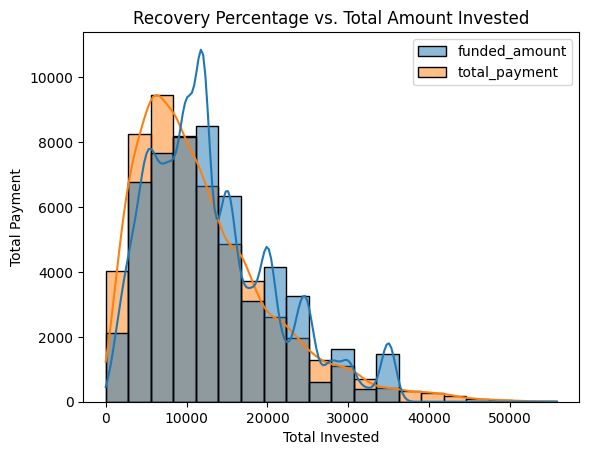

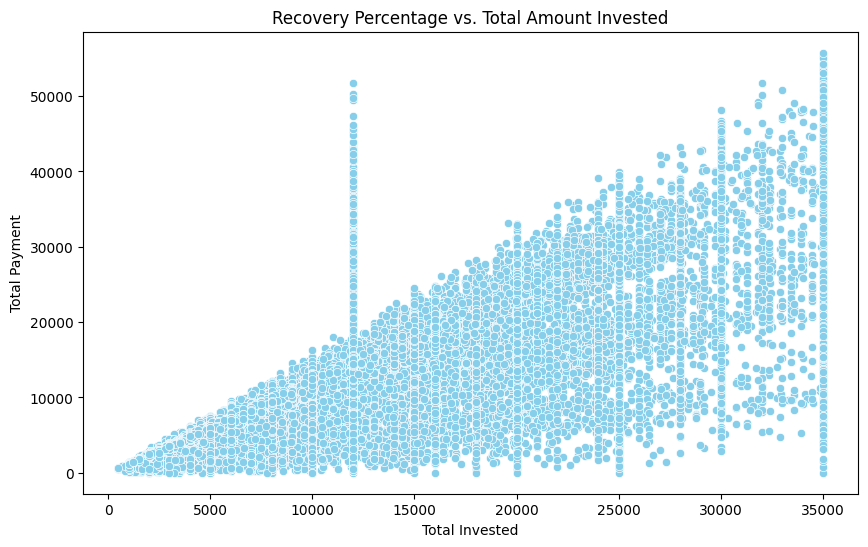

In [29]:
# Total amount of investor funding
total_amount_inv_funded = df_dropped_cols['funded_amount'].sum()
print(f"Total amount of investor funding: {total_amount_inv_funded:,.2f}")

# Calculate the recovery percentage
df_dropped_cols['recovery_percentage_total_fund'] = (df_dropped_cols['total_payment'] / df_dropped_cols['funded_amount']) * 100
    
# Print the 'recovery_percentage_inv'
print(df_dropped_cols[['total_payment', 'funded_amount', 'recovery_percentage_total_fund']])

# Percentage of loans recovered against total amount funded
# Check if the denominator (funded_amount_inv) is not zero or close to zero
denominator = df_dropped_cols['funded_amount'].mean()

if denominator > 1e-10 and not pd.isnull(denominator):
    # Calculate the 'recovery_percentage_inv_fund'
    df_dropped_cols['recovery_percentage_total_fund'] = (df_dropped_cols['total_payment'] / denominator) * 100
    
    # Summarise the mean recovery percentage
    mean_total_recovery_percentage = df_dropped_cols['recovery_percentage_total_fund'].mean()

    print(f"Mean Recovery Percentage: {mean_total_recovery_percentage:.2f}%")
else:
    print("The denominator is zero or close to zero. Cannot calculate the mean recovery percentage.")

# Visualise the results
columns_to_plot = ['funded_amount', 'total_payment']

sns.histplot(df_dropped_cols[columns_to_plot], bins=20, kde=True, color='skyblue')
plt.title('Recovery Percentage vs. Total Amount Invested')
plt.xlabel('Total Invested')
plt.ylabel('Total Payment')
plt.show()

# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='funded_amount', y='total_payment', data=df_dropped_cols, color='skyblue')
plt.title('Recovery Percentage vs. Total Amount Invested')
plt.xlabel('Total Invested')
plt.ylabel('Total Payment')
plt.show()

### Current state of the loans - Recovery against total amount funded by investors

Total amount of investor funding: 702,433,696.79
       total_payment  funded_amount_inv  recovery_percentage_inv_fund
0            2982.51             8000.0                     37.281375
1            4885.11            13200.0                     37.008409
2           16824.54            16000.0                    105.153375
3           15947.47            15000.0                    106.316467
4            5473.46            15000.0                     36.489733
...              ...                ...                           ...
54226        5724.82             1775.0                    322.525070
54227        5931.25             2350.0                    252.393617
54228        3915.37             2225.0                    175.971685
54229        5174.18              225.0                   2299.635556
54230        1501.19              350.0                    428.911429

[54231 rows x 3 columns]
Mean Recovery Percentage: 93.26%


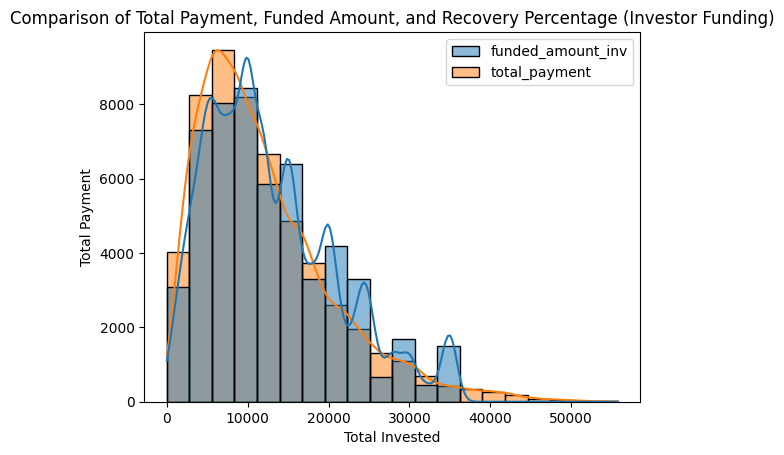

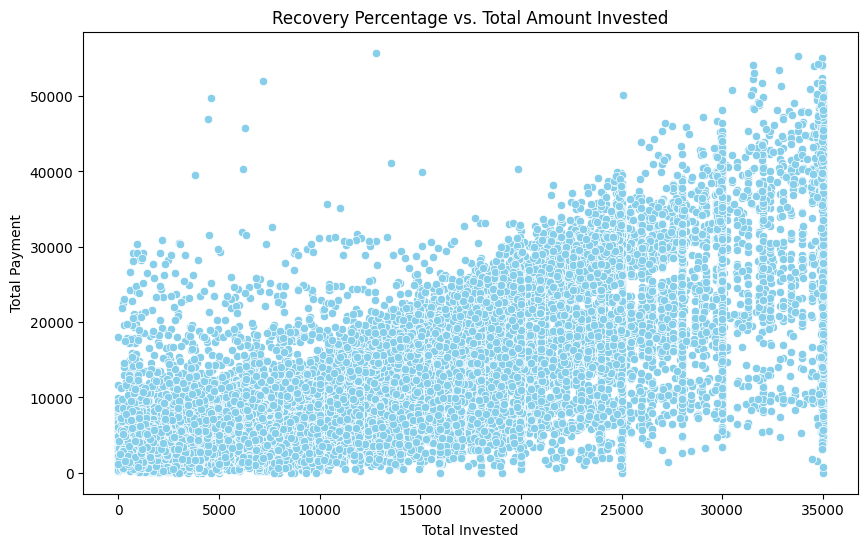

In [28]:
# Total amount of investor funding
total_amount_inv_funded = df_dropped_cols['funded_amount_inv'].sum()
print(f"Total amount of investor funding: {total_amount_inv_funded:,.2f}")

# Calculate the recovery percentage
df_dropped_cols['recovery_percentage_inv_fund'] = (df_dropped_cols['total_payment'] / df_dropped_cols['funded_amount_inv']) * 100
    
# Print the 'recovery_percentage_inv'
print(df_dropped_cols[['total_payment', 'funded_amount_inv', 'recovery_percentage_inv_fund']])

# Percentage of loans recovered against total amount funded
# Check if the denominator (funded_amount_inv) is not zero or close to zero
denominator = df_dropped_cols['funded_amount_inv'].mean()

if denominator > 1e-10 and not pd.isnull(denominator):
    # Calculate the 'recovery_percentage_inv_fund'
    df_dropped_cols['recovery_percentage_inv_fund'] = (df_dropped_cols['total_payment'] / denominator) * 100
    
    # Summarise the mean recovery percentage
    mean_recovery_percentage = df_dropped_cols['recovery_percentage_inv_fund'].mean()

    print(f"Mean Recovery Percentage: {mean_recovery_percentage:.2f}%")
else:
    print("The denominator is zero or close to zero. Cannot calculate the mean recovery percentage.")

# Visualise the results
columns_to_plot = ['funded_amount_inv', 'total_payment']

sns.histplot(df_dropped_cols[columns_to_plot], bins=20, kde=True, color='skyblue')
plt.title('Recovery Percentage vs. Total Amount Invested')
plt.xlabel('Total Invested')
plt.ylabel('Total Payment')
plt.show()

# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='funded_amount_inv', y='total_payment', data=df_dropped_cols, color='skyblue')
plt.title('Recovery Percentage vs. Total Amount Invested')
plt.xlabel('Total Invested')
plt.ylabel('Total Payment')
plt.show()


### Calculating Loss

In [32]:
# Filtering for charged-off loans
charged_off_loans = df_dropped_cols[df_dropped_cols['loan_status'] == 'Charged Off']

# Percentage of charged-off loans historically
charged_off_percentage = (charged_off_loans.shape[0] / df_dropped_cols.shape[0]) * 100

# Total amount paid towards charged-off loans
total_payment_charged_off = charged_off_loans['total_payment'].sum()

print(f"Percentage of charged-off loans historically: {charged_off_percentage:.2f}%")
print(f"Total amount paid towards charged-off loans: {total_payment_charged_off:,.2f}")

Percentage of charged-off loans historically: 10.27%
Total amount paid towards charged-off loans: 37,400,589.04


### Calculating Projected Loss

Total Projected Loss of Charged-Off Loans: 32,552,555.87


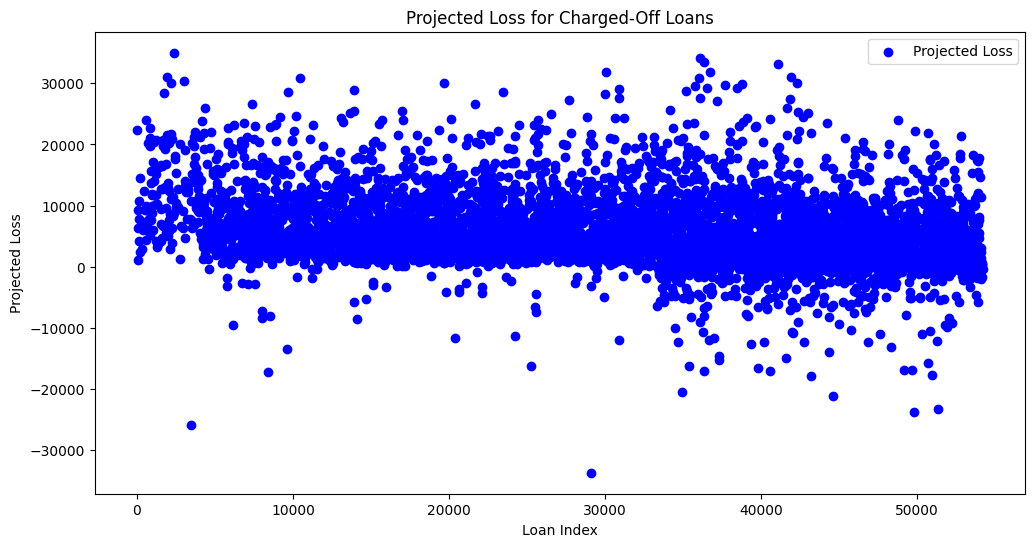

In [44]:
# Calculate the projected loss as the difference between funded amount and (total payment + recoveries)
projected_loss = charged_off_loans['funded_amount'] - (charged_off_loans['total_payment'] + charged_off_loans['recoveries'])

total_projected_loss = (projected_loss).sum()

print(f"Total Projected Loss of Charged-Off Loans: {total_projected_loss:,.2f}")

plt.figure(figsize=(12, 6))
plt.scatter(charged_off_loans.index, (projected_loss), color='blue', label='Projected Loss')
plt.title('Projected Loss for Charged-Off Loans')
plt.xlabel('Loan Index')
plt.ylabel('Projected Loss')
plt.legend()
plt.show()

### Possible loss

In [49]:
# Late payments definitions in 'loan_status'
late_16_30_days_value = 'Late (16-30 days)'
late_31_120_days_value = 'Late (31-120 days)'

# Customers currently behind on their loan payments
late_customers = df_dropped_cols[df_dropped_cols['loan_status'].isin([late_16_30_days_value, late_31_120_days_value])]

# Percentage of customers behind on their loan payments
percentage_late_customers = (late_customers.shape[0] / df_dropped_cols.shape[0]) * 100

# Total amount of customers in this bracket
total_late_customers = late_customers.shape[0]

# The loss the company would incur if the status of these customers was changed to Charged Off
loss_if_charged_off = late_customers['total_payment'].sum()

# Projected loss of these loans if the customers were to finish the full loan term
projected_loss_full_term = late_customers['loan_amount'] - late_customers['total_payment']

# Total projected loss of these loans if the customers were to finish the full loan term
total_projected_loss_full_term = (projected_loss_full_term).sum()

# Determining what percentage of total expected revenue customers who are late on payments and those who have already defaulted represent
total_expected_revenue = df_dropped_cols['total_payment'].sum()
percentage_total_revenue_loss = ((total_projected_loss_full_term) / total_expected_revenue) * 100

print(f"Percentage of customers currently behind on payments: {percentage_late_customers:.2f}%")
print(f"Total number of customers currently behind on payments: {total_late_customers}")
print(f"Loss the company would incur if they were charged off: {loss_if_charged_off:,.2f}")
print(f"Projected loss of these loans if customers finish the full term: {total_projected_loss_full_term:,.2f}")
print(f"Percentage of total expected revenue loss: {percentage_total_revenue_loss:.2f}%")

Percentage of customers currently behind on payments: 1.26%
Total number of customers currently behind on payments: 686
Loss the company would incur if they were charged off: 6,894,024.95
Projected loss of these loans if customers finish the full term: 3,408,775.05
Percentage of total expected revenue loss: 0.52%
